In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Get data from file
cwd = "/Users/madea/Desktop/DS4A/data/"
filename = "merged_RRI_SRI_data.csv"
filepath = cwd + filename
print(filepath)

/Users/madea/Desktop/DS4A/data/merged_RRI_SRI_data.csv


In [5]:
SRI_RRI_df = pd.read_csv(filepath)
SRI_RRI_df = SRI_RRI_df[SRI_RRI_df.notna()]

In [6]:
print("Number of Features:", len(SRI_RRI_df.columns))
print("Number of Samples: ", len(SRI_RRI_df.index))
print(SRI_RRI_df.head(5))

Number of Features: 1191
Number of Samples:  1091
         date  segment_1307_max_SRI  segment_873_max_SRI  segment_863_max_SRI  \
0  2018-03-08              3.718594             3.457253             4.562368   
1  2018-03-09              4.522901             3.488016             2.997927   
2  2018-03-10              6.107322             1.234070             3.085771   
3  2018-03-11              3.873077             1.261212             6.840369   
4  2018-03-12              5.228657             3.413127             4.470042   

   segment_1061_max_SRI  segment_235_max_SRI  segment_225_max_SRI  \
0              0.044862             2.945760             4.199607   
1              0.044862             2.187291             5.328785   
2              0.044862             2.719971             5.989625   
3              0.044862             3.189822             5.489281   
4              0.044862             3.863130             4.415463   

   segment_460_max_SRI  segment_518_max_SRI  seg

Considering each segment of the road and station of the subway as the feature. Sample points are respectively SRI and RRI for given day, date in time.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

copy_df = SRI_RRI_df.copy(deep=True)
copy_df = copy_df.fillna(0)

# train_percent = 0.7
# total_num_samples = len(copy_df.index)
# train_samples = math.ceil(train_percent * total_num_samples)

# train_df = copy_df[0:train_samples].copy(deep=True)

features = copy_df.columns[copy_df.columns != 'date']

# train_df = train_df.dropna()
x = copy_df.loc[:, features].values
y = copy_df.loc[:,['date']].values

print(copy_df.columns)
print(x)

X = StandardScaler().fit_transform(x)


Index(['date', 'segment_1307_max_SRI', 'segment_873_max_SRI',
       'segment_863_max_SRI', 'segment_1061_max_SRI', 'segment_235_max_SRI',
       'segment_225_max_SRI', 'segment_460_max_SRI', 'segment_518_max_SRI',
       'segment_470_max_SRI',
       ...
       'station_40840_max_RRI', 'station_40850_max_RRI',
       'station_40610_max_RRI', 'station_40600_max_RRI',
       'station_41690_max_RRI', 'station_41680_max_RRI',
       'station_40280_max_RRI', 'station_40290_max_RRI',
       'station_41200_max_RRI', 'station_41210_max_RRI'],
      dtype='object', length=1191)
[[ 3.71859434  3.45725327  4.56236783 ...  1.46995743  1.25760969
   0.46676522]
 [ 4.52290077  3.4880156   2.99792708 ...  1.30820061  0.73234454
   0.97556654]
 [ 6.10732158  1.23406956  3.08577103 ...  2.43492688  1.47396656
   3.28196059]
 ...
 [ 5.00027527  1.26121192  3.07582245 ... -1.14913715 -1.13862284
  -1.94974363]
 [ 5.1207392   1.3205983   1.99847392 ...  2.28822288  1.41131448
   2.69400324]
 [ 3.48198141

In [41]:
num_components = 2
pca = PCA(n_components = num_components)
principalComponents = pca.fit_transform(X)


print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Singular Values:", pca.singular_values_)

PCA Explained Variance Ratio: [0.11049072 0.08191194]
PCA Singular Values: [378.26889848 325.69519219]


In [53]:
PCA_df = pd.DataFrame(data = principalComponents,
                      columns = ['pc1', 'pc2'])
PCA_df['date'] = y
print(PCA_df.head(5))

        pc1        pc2        date
0 -9.296984  -3.748080  2018-03-08
1 -7.589957  -4.760699  2018-03-09
2  3.523980 -13.698625  2018-03-10
3  5.665600 -21.936094  2018-03-11
4 -9.002845  -3.056505  2018-03-12


## Using Plotly vs. Seaborn

Plotly is an interactive map. Can hover over each point to get information on pc1, pc2, and date values.

In [63]:
import plotly.express as px
# # visualize PCA https://plotly.com/python/pca-visualization/
# total_variance = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(PCA_df, x="pc1", y="pc2", color=PCA_df["date"], labels = {str(i):f"PC {i+1}" for i in range(num_components)})

fig.show()



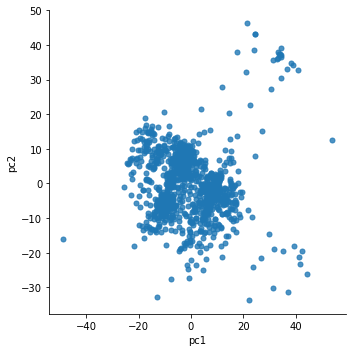

In [67]:
sns.lmplot(x="pc1", y="pc2",
        data=PCA_df,
        fit_reg=False,
        legend=True,
        scatter_kws={"s": 25})

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
